In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch

In [2]:
from gluonts.dataset.multivariate_grouper import MultivariateGrouper
from gluonts.dataset.repository.datasets import dataset_recipes, get_dataset
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import MultivariateEvaluator

from gluonts.torch.model.softs import SofTSEstimator

In [3]:
dataset = get_dataset("electricity_nips", regenerate=False)

In [4]:
train_grouper = MultivariateGrouper(
    max_target_dim=int(dataset.metadata.feat_static_cat[0].cardinality)
)

test_grouper = MultivariateGrouper(
    num_test_dates=int(len(dataset.test) / len(dataset.train)),
    max_target_dim=int(dataset.metadata.feat_static_cat[0].cardinality),
)

In [5]:
dataset_train = train_grouper(dataset.train)
dataset_test = test_grouper(dataset.test)

/Users/kashif/Github/gluon-ts/src/gluonts/dataset/common.py:263: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.Period(val, freq)


In [6]:
estimator = SofTSEstimator(
    prediction_length=dataset.metadata.prediction_length,
    context_length=dataset.metadata.prediction_length * 3,
    scaling="std",
    nonnegative_pred_samples=True,
    trainer_kwargs=dict(max_epochs=20),
)

In [7]:
predictor = estimator.train(
    dataset_train, cache_data=True, shuffle_buffer_length=1024
)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/homebrew/lib/python3.11/site-packages/lightning/pytorch/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type       | Params | Mode 
---------------------------------------------
0 | model | SofTSModel | 167 K  | train
---------------------------------------------
167 K     Trainable params
0         Non-trainable params
167 K     Total params
0.669     Total estimated model params size (MB)


Training: |                                                                                                   …

Epoch 0, global step 50: 'train_loss' reached 4.72160 (best 4.72160), saving model to '/Users/kashif/Github/gluon-ts/examples/lightning_logs/version_191/checkpoints/epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 4.44318 (best 4.44318), saving model to '/Users/kashif/Github/gluon-ts/examples/lightning_logs/version_191/checkpoints/epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' was not in top 1
Epoch 3, global step 200: 'train_loss' was not in top 1
Epoch 4, global step 250: 'train_loss' was not in top 1
Epoch 5, global step 300: 'train_loss' was not in top 1
Epoch 6, global step 350: 'train_loss' was not in top 1
Epoch 7, global step 400: 'train_loss' was not in top 1
Epoch 8, global step 450: 'train_loss' was not in top 1
Epoch 9, global step 500: 'train_loss' was not in top 1
Epoch 10, global step 550: 'train_loss' was not in top 1
Epoch 11, global step 600: 'train_loss' was not in top 1
Epoch 12, global step 650: 'train_loss' was 

In [8]:
evaluator = MultivariateEvaluator(
    quantiles=(np.arange(20) / 20.0)[1:], target_agg_funcs={"sum": np.sum}
)

In [9]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset_test, predictor=predictor, num_samples=100
)
forecasts = list(forecast_it)
targets = list(ts_it)
agg_metric, _ = evaluator(targets, forecasts, num_series=len(dataset_test))

Running evaluation: 7it [00:00, 293.69it/s]
Running evaluation: 7it [00:00, 272.13it/s]
Running evaluation: 7it [00:00, 275.74it/s]
Running evaluation: 7it [00:00, 275.09it/s]
Running evaluation: 7it [00:00, 266.01it/s]
Running evaluation: 7it [00:00, 293.06it/s]
Running evaluation: 7it [00:00, 315.60it/s]
Running evaluation: 7it [00:00, 322.03it/s]
Running evaluation: 7it [00:00, 315.30it/s]
Running evaluation: 7it [00:00, 316.00it/s]
Running evaluation: 7it [00:00, 321.09it/s]
Running evaluation: 7it [00:00, 320.51it/s]
Running evaluation: 7it [00:00, 322.45it/s]
Running evaluation: 7it [00:00, 258.78it/s]
Running evaluation: 7it [00:00, 332.85it/s]
Running evaluation: 7it [00:00, 315.36it/s]
Running evaluation: 7it [00:00, 327.07it/s]
Running evaluation: 7it [00:00, 321.42it/s]
Running evaluation: 7it [00:00, 342.33it/s]
Running evaluation: 7it [00:00, 323.64it/s]
Running evaluation: 7it [00:00, 322.02it/s]
Running evaluation: 7it [00:00, 330.24it/s]
Running evaluation: 7it [00:00, 

Running evaluation: 7it [00:00, 307.22it/s]
Running evaluation: 7it [00:00, 299.57it/s]
Running evaluation: 7it [00:00, 310.15it/s]
Running evaluation: 7it [00:00, 306.87it/s]
Running evaluation: 7it [00:00, 320.29it/s]
Running evaluation: 7it [00:00, 332.41it/s]
Running evaluation: 7it [00:00, 304.42it/s]
Running evaluation: 7it [00:00, 294.85it/s]
Running evaluation: 7it [00:00, 304.23it/s]
Running evaluation: 7it [00:00, 311.32it/s]
Running evaluation: 7it [00:00, 304.89it/s]
Running evaluation: 7it [00:00, 326.66it/s]
Running evaluation: 7it [00:00, 324.90it/s]
Running evaluation: 7it [00:00, 318.30it/s]
Running evaluation: 7it [00:00, 297.52it/s]
Running evaluation: 7it [00:00, 285.48it/s]
Running evaluation: 7it [00:00, 313.14it/s]
Running evaluation: 7it [00:00, 312.59it/s]
Running evaluation: 7it [00:00, 322.15it/s]
Running evaluation: 7it [00:00, 305.86it/s]
Running evaluation: 7it [00:00, 320.38it/s]
Running evaluation: 7it [00:00, 306.87it/s]
Running evaluation: 7it [00:00, 

Running evaluation: 7it [00:00, 323.28it/s]
Running evaluation: 7it [00:00, 306.33it/s]
Running evaluation: 7it [00:00, 324.28it/s]
Running evaluation: 7it [00:00, 342.45it/s]
Running evaluation: 7it [00:00, 255.71it/s]
Running evaluation: 7it [00:00, 327.41it/s]
Running evaluation: 7it [00:00, 331.09it/s]
Running evaluation: 7it [00:00, 37.91it/s]
Running evaluation: 7it [00:00, 356.36it/s]
Running evaluation: 7it [00:00, 335.62it/s]
Running evaluation: 7it [00:00, 329.51it/s]
Running evaluation: 7it [00:00, 335.69it/s]
Running evaluation: 7it [00:00, 342.95it/s]
Running evaluation: 7it [00:00, 335.59it/s]
Running evaluation: 7it [00:00, 321.93it/s]
Running evaluation: 7it [00:00, 326.63it/s]
Running evaluation: 7it [00:00, 316.81it/s]
Running evaluation: 7it [00:00, 320.72it/s]
Running evaluation: 7it [00:00, 317.59it/s]
Running evaluation: 7it [00:00, 349.91it/s]
Running evaluation: 0it [00:00, ?it/s]/Users/kashif/Github/gluon-ts/src/gluonts/evaluation/_base.py:673: FutureWarning: T

In [10]:
print("CRPS: {}".format(agg_metric["mean_wQuantileLoss"]))
print("ND: {}".format(agg_metric["ND"]))
print("NRMSE: {}".format(agg_metric["NRMSE"]))
print("MSE: {}".format(agg_metric["MSE"]))

CRPS: 0.07235408093311933
ND: 0.08831799426943296
NRMSE: 0.7095356392484358
MSE: 288347.45855824975


In [11]:
print("CRPS-Sum: {}".format(agg_metric["m_sum_mean_wQuantileLoss"]))
print("ND-Sum: {}".format(agg_metric["m_sum_ND"]))
print("NRMSE-Sum: {}".format(agg_metric["m_sum_NRMSE"]))
print("MSE-Sum: {}".format(agg_metric["m_sum_MSE"]))

CRPS-Sum: 0.03328615272714149
ND-Sum: 0.04550841537284284
NRMSE-Sum: 0.054424385869708096
MSE-Sum: 232251343.23809525


In [12]:
def plot(
    target,
    forecast,
    prediction_length,
    prediction_intervals=(50.0, 90.0),
    color="g",
    fname=None,
):
    label_prefix = ""
    rows = 4
    cols = 4
    fig, axs = plt.subplots(rows, cols, figsize=(24, 24))
    axx = axs.ravel()
    seq_len, target_dim = target.shape

    ps = [50.0] + [
        50.0 + f * c / 2.0 for c in prediction_intervals for f in [-1.0, +1.0]
    ]

    percentiles_sorted = sorted(set(ps))

    def alpha_for_percentile(p):
        return (p / 100.0) ** 0.3

    for dim in range(0, min(rows * cols, target_dim)):
        ax = axx[dim]

        target[-2 * prediction_length :][dim].plot(ax=ax)

        ps_data = [
            forecast.quantile(p / 100.0)[:, dim] for p in percentiles_sorted
        ]
        i_p50 = len(percentiles_sorted) // 2

        p50_data = ps_data[i_p50]
        p50_series = pd.Series(data=p50_data, index=forecast.index)
        p50_series.plot(
            color=color, ls="-", label=f"{label_prefix}median", ax=ax
        )

        for i in range(len(percentiles_sorted) // 2):
            ptile = percentiles_sorted[i]
            alpha = alpha_for_percentile(ptile)
            ax.fill_between(
                forecast.index,
                ps_data[i],
                ps_data[-i - 1],
                facecolor=color,
                alpha=alpha,
                interpolate=True,
            )
            # Hack to create labels for the error intervals.
            # Doesn't actually plot anything, because we only pass a single data point
            pd.Series(data=p50_data[:1], index=forecast.index[:1]).plot(
                color=color,
                alpha=alpha,
                linewidth=10,
                label=f"{label_prefix}{100 - ptile * 2}%",
                ax=ax,
            )

    legend = ["observations", "median prediction"] + [
        f"{k}% prediction interval" for k in prediction_intervals
    ][::-1]
    axx[0].legend(legend, loc="upper left")

    if fname is not None:
        plt.savefig(fname, bbox_inches="tight", pad_inches=0.05)

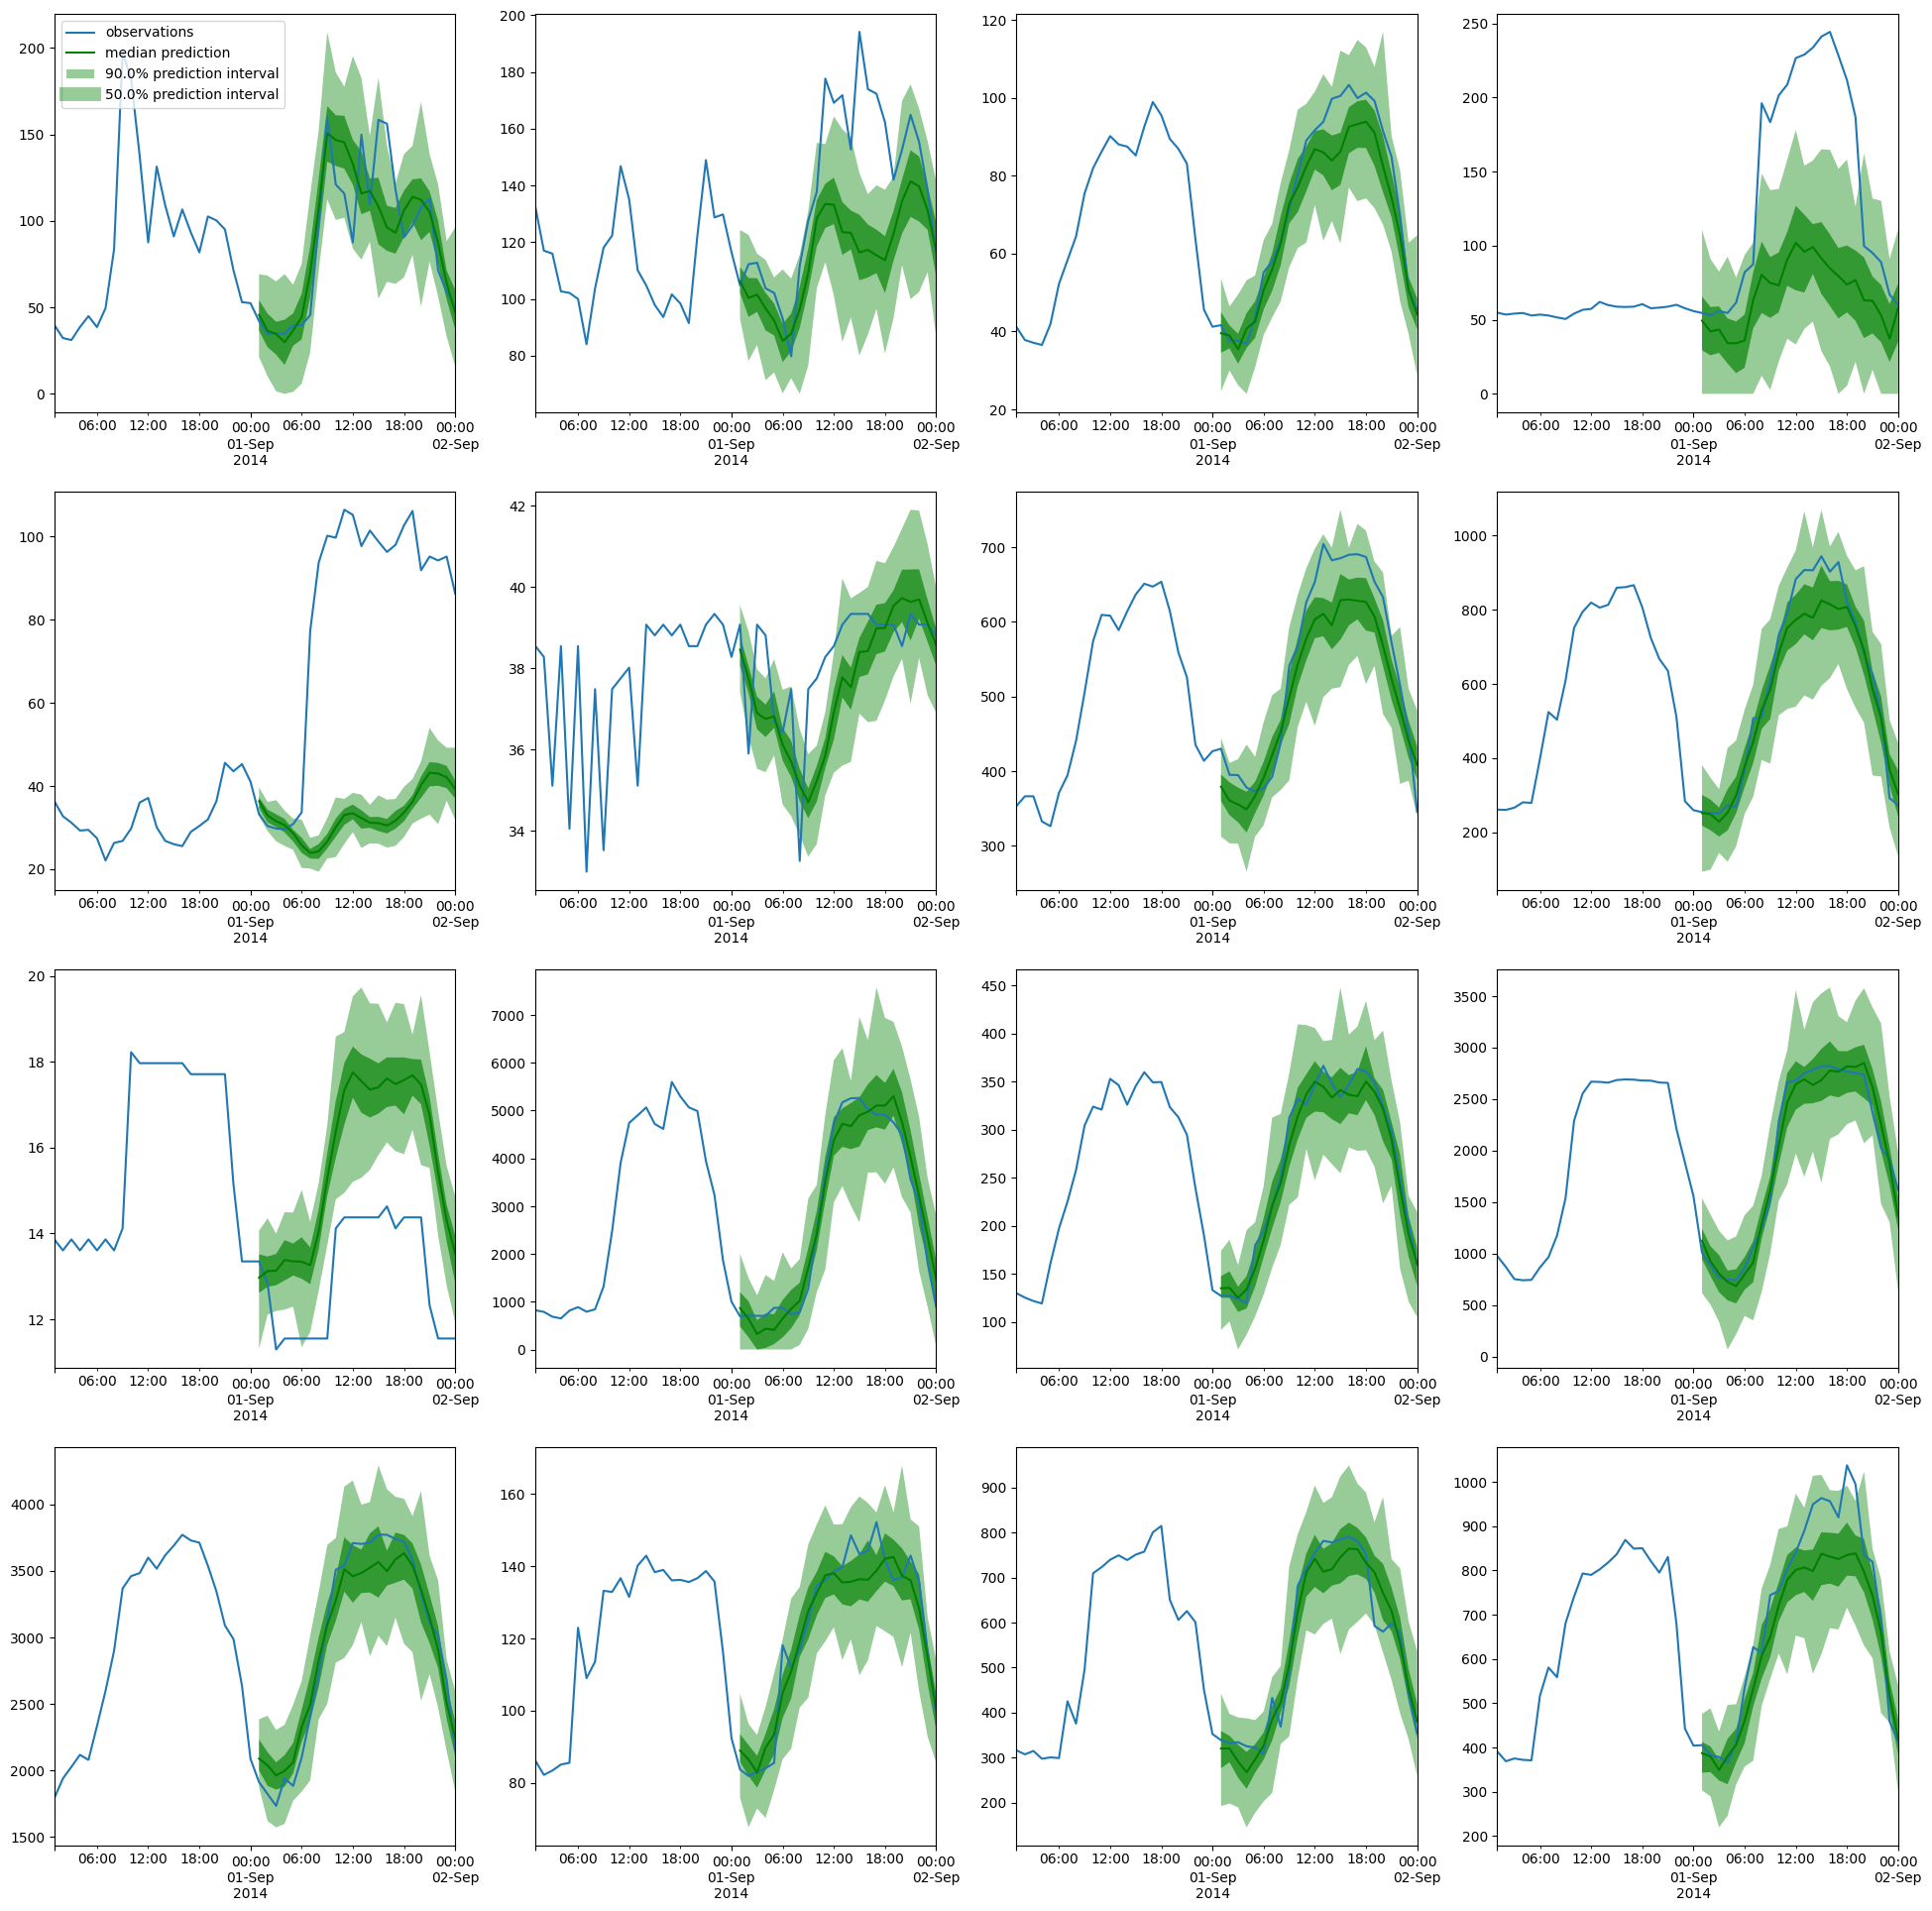

In [13]:
plot(
    target=targets[0],
    forecast=forecasts[0],
    prediction_length=dataset.metadata.prediction_length,
)
plt.show()